## Observations and Insights 

In [388]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata_df = pd.read_csv(mouse_metadata_path)
study_results_df = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merge_df = pd.merge(mouse_metadata_df, study_results_df, on="Mouse ID")

# Display the data table for preview
merge_df=merge_df.dropna(how='any')
merge_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [389]:
# Check the number of mice.
state_mice = merge_df.groupby("Mouse ID")
state_mice["Mouse ID"].count()
#there are 249 different kinds of mice.
#there are 1893 observations in total.

Mouse ID
a203    10
a251    10
a262    10
a275    10
a366     7
        ..
z435     3
z578    10
z581    10
z795    10
z969    10
Name: Mouse ID, Length: 249, dtype: int64

In [390]:
# Find any duplicate rows with the same Mouse ID's and Timepoints. 
duplicate_rows=state_mice["Timepoint"].count()
duplicate_rows

Mouse ID
a203    10
a251    10
a262    10
a275    10
a366     7
        ..
z435     3
z578    10
z581    10
z795    10
z969    10
Name: Timepoint, Length: 249, dtype: int64

In [391]:
# Drop any duplicate rows
merge_df1=merge_df.drop_duplicates(subset=["Mouse ID"])
merge_df1

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
10,s185,Capomulin,Female,3,17,0,45.0,0
20,x401,Capomulin,Female,16,15,0,45.0,0
30,m601,Capomulin,Male,22,17,0,45.0,0
40,g791,Ramicane,Male,11,16,0,45.0,0
...,...,...,...,...,...,...,...,...
1858,z314,Stelasyn,Female,21,28,0,45.0,0
1860,z435,Propriva,Female,12,26,0,45.0,0
1863,z581,Infubinol,Female,24,25,0,45.0,0
1873,z795,Naftisol,Female,13,29,0,45.0,0


In [392]:
# Recheck the number of mice
merge_df1 = merge_df1.sort_values("Mouse ID")
merge_df1 = merge_df1.reset_index(drop=True)
merge_df1
#after we drop the duplicate rows, we only have 249 rows.

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,Female,20,23,0,45.0,0
1,a251,Infubinol,Female,21,25,0,45.0,0
2,a262,Placebo,Female,17,29,0,45.0,0
3,a275,Ceftamin,Female,20,28,0,45.0,0
4,a366,Stelasyn,Female,16,29,0,45.0,0
...,...,...,...,...,...,...,...,...
244,z435,Propriva,Female,12,26,0,45.0,0
245,z578,Ramicane,Male,11,16,0,45.0,0
246,z581,Infubinol,Female,24,25,0,45.0,0
247,z795,Naftisol,Female,13,29,0,45.0,0


## Summary Statistics

In [393]:
# Generate a summary statistics table of mean, median, variance, 
# standard deviation, and SEM of the tumor volume for each regimen.
print(merge_df1["Tumor Volume (mm3)"].describe())
grouped_single = merge_df1.groupby('Drug Regimen').agg({'Tumor Volume (mm3)': ['mean', 'median']})
print(grouped_single)

count    249.0
mean      45.0
std        0.0
min       45.0
25%       45.0
50%       45.0
75%       45.0
max       45.0
Name: Tumor Volume (mm3), dtype: float64
             Tumor Volume (mm3)       
                           mean median
Drug Regimen                          
Capomulin                  45.0   45.0
Ceftamin                   45.0   45.0
Infubinol                  45.0   45.0
Ketapril                   45.0   45.0
Naftisol                   45.0   45.0
Placebo                    45.0   45.0
Propriva                   45.0   45.0
Ramicane                   45.0   45.0
Stelasyn                   45.0   45.0
Zoniferol                  45.0   45.0


## Bar and Pie Charts

,drug
Placebo,25
Propriva,25
Ceftamin,25
Capomulin,25
Zoniferol,25
Ramicane,25
Naftisol,25
Ketapril,25
Infubinol,25
Stelasyn,24


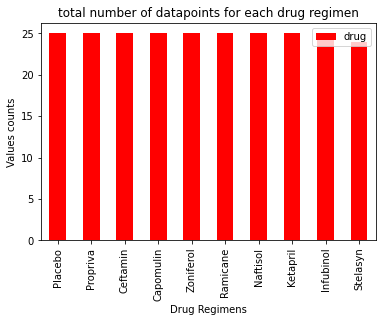

In [394]:
# Generate a bar plot showing the total number of datapoints for each drug regimen using pandas.
# There should be a single bar per regimen
drug_data=pd.DataFrame({'drug':merge_df1["Drug Regimen"].value_counts()})
drug_data.plot.bar(y='drug',facecolor="red")
plt.title("total number of datapoints for each drug regimen")
plt.xlabel("Drug Regimens")
plt.ylabel("Values counts")
drug_data

Text(0, 0.5, 'Values counts')

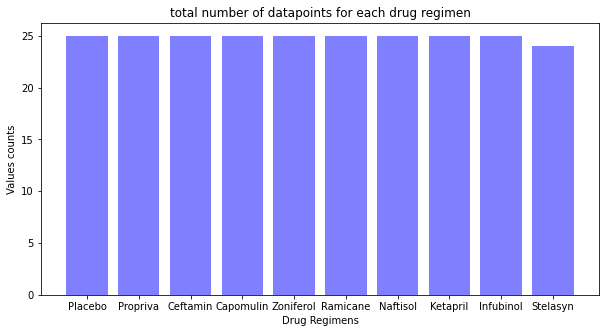

In [395]:
# General identical bar plot using pyplot instead of pandas.
x_axis=["Placebo","Propriva","Ceftamin","Capomulin","Zoniferol","Ramicane","Naftisol","Ketapril","Infubinol","Stelasyn"]
y_axis=merge_df1["Drug Regimen"].value_counts()
plt.figure(figsize=(10,5))
plt.bar(x_axis, y_axis, color='b', alpha=0.5, align="center")
plt.title("total number of datapoints for each drug regimen")
plt.xlabel("Drug Regimens")
plt.ylabel("Values counts")

Text(0.5, 1.0, 'distribution of female versus male mice')

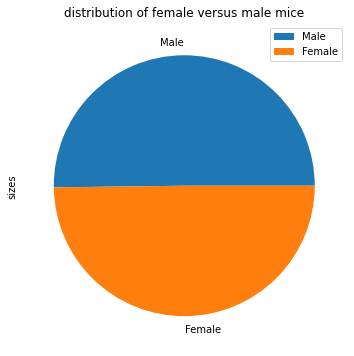

In [396]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
df = pd.DataFrame({'sizes':merge_df1["Sex"].value_counts()},
                  index=['Male', 'Female'])
plot = df.plot.pie(y='sizes', figsize=(6, 6))
plt.title("distribution of female versus male mice")

Text(0.5, 1.0, 'distribution of female versus male mice')

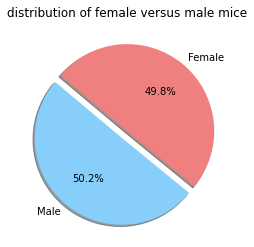

In [397]:
# Generate identical pie plot using pyplot
sizes=merge_df1["Sex"].value_counts()
sizes
labels=["Male","Female"]
colors = ["lightskyblue","lightcoral"]
explode=(0.1,0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("distribution of female versus male mice")

## Quartiles, Outliers and Boxplots

In [398]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# HINT: Not all mice lived until timepoint 45
# Start by getting the last (greatest) timepoint for each mouse
A = merge_df[["Mouse ID", "Drug Regimen", "Timepoint","Tumor Volume (mm3)"]]
A.head()
B = A.loc[A["Timepoint"] == 45, [
    "Mouse ID", "Drug Regimen", "Timepoint","Tumor Volume (mm3)"]]
#first getting the last (greatest) timepoint for each mouse across Capomulin.
C=B.loc[B["Drug Regimen"] =="Capomulin", [
    "Mouse ID", "Drug Regimen", "Timepoint","Tumor Volume (mm3)"]]

# getting the last (greatest) timepoint for each mouse across Ramicane.
D=B.loc[B["Drug Regimen"] =="Ramicane", [
    "Mouse ID", "Drug Regimen", "Timepoint","Tumor Volume (mm3)"]]

# getting the last (greatest) timepoint for each mouse across Infubinol.
E=B.loc[B["Drug Regimen"] =="Infubinol", [
    "Mouse ID", "Drug Regimen", "Timepoint","Tumor Volume (mm3)"]]

# getting the last (greatest) timepoint for each mouse across Ceftamin.
F=B.loc[B["Drug Regimen"] =="Ceftamin", [
    "Mouse ID", "Drug Regimen", "Timepoint","Tumor Volume (mm3)"]]

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
frames = [C,D,E,F]
result = pd.concat(frames)
result

,Mouse ID,Drug Regimen,Timepoint,Tumor Volume (mm3)
19,s185,Capomulin,45,23.343598
29,x401,Capomulin,45,28.484033
39,m601,Capomulin,45,28.430964
104,u364,Capomulin,45,31.023923
124,y793,Capomulin,45,31.896238
...,...,...,...,...
1670,w151,Ceftamin,45,67.527482
1773,x581,Ceftamin,45,64.634949
1797,x822,Ceftamin,45,61.386660
1845,y769,Ceftamin,45,68.594745


Calculate the quartiles and IQR and quantitatively determine if there are any potential outliers across all four treatment regimens.

In [399]:
# Calculate quartiles, IQR, and identify potential outliers for each regimen.

# quartiles, IQR, and identify potential outliers for Capomulin
quartiles1 = C["Tumor Volume (mm3)"].quantile([.25,.5,.75])
lowerq1 = quartiles1[0.25]
upperq1 = quartiles1[0.75]
iqr1 = upperq1-lowerq1
print(f"The lower quartile of Capomulin is: {lowerq1}")
print(f"The upper quartile of Capomulin is: {upperq1}")
print(f"The interquartile range of Capomulin is: {iqr1}")
print(f"The the median of Capomulin is: {quartiles1[0.5]} ")
lower_bound1 = lowerq1 - (1.5*iqr1)
upper_bound1 = upperq1 + (1.5*iqr1)
print(f"Values below {lower_bound1} could be outliers.")
print(f"Values above {upper_bound1} could be outliers.")
print("-----------------------------------------------------")

# quartiles, IQR, and identify potential outliers for Ramicane
quartiles2 = D["Tumor Volume (mm3)"].quantile([.25,.5,.75])
lowerq2 = quartiles2[0.25]
upperq2 = quartiles2[0.75]
iqr2 = upperq2-lowerq2
print(f"The lower quartile of Ramicane is: {lowerq2}")
print(f"The upper quartile of Ramicane is: {upperq2}")
print(f"The interquartile range of Ramicane is: {iqr2}")
print(f"The the median of Ramicane is: {quartiles2[0.5]} ")
lower_bound2 = lowerq2 - (1.5*iqr2)
upper_bound2 = upperq2 + (1.5*iqr2)
print(f"Values below {lower_bound2} could be outliers.")
print(f"Values above {upper_bound2} could be outliers.")
print("-----------------------------------------------------")

# quartiles, IQR, and identify potential outliers for Infubinol
quartiles3 = E["Tumor Volume (mm3)"].quantile([.25,.5,.75])
lowerq3 = quartiles3[0.25]
upperq3 = quartiles3[0.75]
iqr3 = upperq3-lowerq3
print(f"The lower quartile of Infubinol is: {lowerq3}")
print(f"The upper quartile of Infubinol is: {upperq3}")
print(f"The interquartile range of Infubinol is: {iqr3}")
print(f"The the median of Infubinol is: {quartiles3[0.5]} ")
lower_bound3 = lowerq3 - (1.5*iqr3)
upper_bound3 = upperq3 + (1.5*iqr3)
print(f"Values below {lower_bound3} could be outliers.")
print(f"Values above {upper_bound3} could be outliers.")
print("-----------------------------------------------------")

# quartiles, IQR, and identify potential outliers for Ceftamin
quartiles4 = F["Tumor Volume (mm3)"].quantile([.25,.5,.75])
lowerq4 = quartiles4[0.25]
upperq4 = quartiles4[0.75]
iqr4 = upperq4-lowerq4
print(f"The lower quartile of Ceftamin is: {lowerq4}")
print(f"The upper quartile of Ceftamin is: {upperq4}")
print(f"The interquartile range of Ceftamin is: {iqr4}")
print(f"The the median of Ceftamin is: {quartiles4[0.5]} ")
lower_bound4 = lowerq4 - (1.5*iqr4)
upper_bound4 = upperq4 + (1.5*iqr4)
print(f"Values below {lower_bound4} could be outliers.")
print(f"Values above {upper_bound4} could be outliers.")
print("-----------------------------------------------------")

# One method to do this is the following, but you can use whatever method works for you.

##############################################################################
# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)


The lower quartile of Capomulin is: 32.37735684
The upper quartile of Capomulin is: 40.1592203
The interquartile range of Capomulin is: 7.781863460000004
The the median of Capomulin is: 37.31184577 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.
-----------------------------------------------------
The lower quartile of Ramicane is: 30.981175224999998
The upper quartile of Ramicane is: 38.508305307499995
The interquartile range of Ramicane is: 7.527130082499998
The the median of Ramicane is: 34.848627300000004 
Values below 19.690480101250003 could be outliers.
Values above 49.79900043124999 could be outliers.
-----------------------------------------------------
The lower quartile of Infubinol is: 62.75445141
The upper quartile of Infubinol is: 67.68556862
The interquartile range of Infubinol is: 4.9311172099999965
The the median of Infubinol is: 66.08306589 
Values below 55.35777559500001 could be outliers.
Values above 75.08224443499999

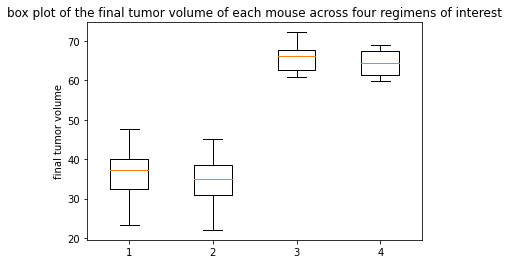

In [400]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
# There should be a single chart with four box plots inside it.
data = [C.iloc[:,3], D.iloc[:,3], E.iloc[:,3], F.iloc[:,3]]
fig, ax = plt.subplots()
ax.set_title('box plot of the final tumor volume of each mouse across four regimens of interest')
ax.set_ylabel('final tumor volume')
ax.boxplot(data)
plt.show()


## Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume (mm3)')

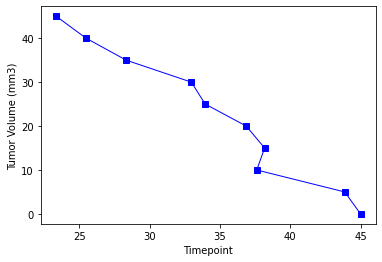

In [401]:
# Generate a line plot of tumor volume vs. time point for a single mouse 
# treated with Capomulin

# First find a single mouse that used Capomulin
example=merge_df.loc[merge_df["Drug Regimen"] =="Capomulin", [
    "Mouse ID", "Drug Regimen", "Timepoint","Tumor Volume (mm3)"]]

# Then we select one mouse who survived to 45 timepoint.
example1=example.loc[example["Mouse ID"]=="s185",[
    "Mouse ID","Drug Regimen", "Timepoint","Tumor Volume (mm3)"]]

#get all the data for "s185" mouse.
data1 = np.arange(0,50,5)
time_points=[45,43.878496,37.614948,38.177232,36.866876,33.949940,32.959671,28.328531,25.472143,23.343598]
example_test, = plt.plot(time_points, data1, marker="s",color="blue", linewidth=1, label="tumor volume")
example1
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")

19     22
24     21
61     17
64     19
66     22
81     24
84     20
86     23
88     21
109    21
116    19
122    17
125    19
163    25
164    17
170    25
175    17
181    23
184    17
193    17
205    21
209    23
221    21
227    15
240    17
Name: Weight (g), dtype: int64
         Tumor Volume (mm3)
                       mean
Mouse ID                   
b128              41.963636
b742              40.083699
f966              36.505973
g288              41.990097
g316              44.613344
i557              44.805810
i738              39.141053
j119              44.465236
j246              43.216925
l509              44.434474
l897              42.507261
m601              34.847470
m957              39.049816
r157              45.798970
r554              36.509212
r944              43.367364
s185              34.559143
s710              42.803733
t565              39.328725
u364              39.887495
v923              41.581595
w150              41.384825
w914              4

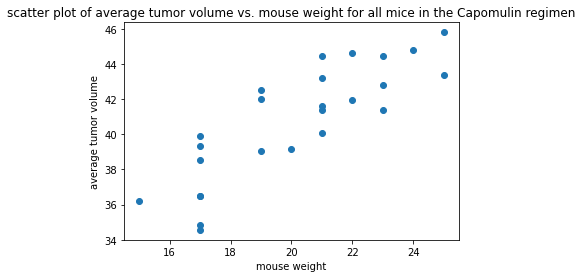

In [402]:
# Generate a scatter plot of average tumor volume vs. mouse weight 
# for all mice in the Capomulin regimen

# FIRST get all unique weights for all mice in the Capomulin regimen.
exampleA=merge_df1.loc[merge_df1["Drug Regimen"] =="Capomulin", [
    "Mouse ID", "Drug Regimen", "Weight (g)","Tumor Volume (mm3)"]]
# SECOND, get all of tumor values in all timepoints for all mice in the Capomulin regimen.
exampleB=merge_df.loc[merge_df["Drug Regimen"] =="Capomulin", [
    "Mouse ID", "Drug Regimen", "Weight (g)","Tumor Volume (mm3)"]]

# GET the average tumor volume for all mice in the Capomulin regimen
grouped_AVERAGE = exampleB.groupby('Mouse ID').agg({'Tumor Volume (mm3)': ['mean']})

print(exampleA["Weight (g)"])
print(grouped_AVERAGE)
#get the average tumor volume for all mice in the Capomulin regimen to a list
grouped_tumor_volume=[41.963636,40.083699,36.505973,41.990097,44.613344,44.805810,39.141053,44.465236,43.216925,44.434474,42.507261,34.847470,39.049816,45.798970,36.509212,43.367364,34.559143,42.803733,39.328725,39.887495,41.581595,41.384825,41.352452,36.182040,38.506829]
plt.scatter(exampleA["Weight (g)"],grouped_tumor_volume)
plt.title('scatter plot of average tumor volume vs. mouse weight for all mice in the Capomulin regimen')
plt.xlabel('mouse weight')
plt.ylabel('average tumor volume')
plt.show()

## Correlation and Regression

The correlation between verage tumor volume and mouse weight is 0.84
The r-squared is: 0.7088567831695668


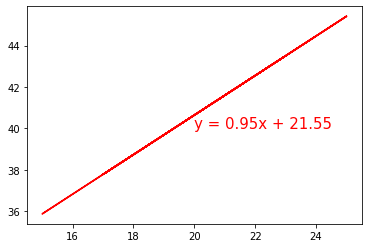

In [403]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(exampleA["Weight (g)"],grouped_tumor_volume)
print(f"The correlation between verage tumor volume and mouse weight is {round(correlation[0],2)}")

plt.scatter(exampleA["Weight (g)"],grouped_tumor_volume)
plt.title('scatter plot of average tumor volume vs. mouse weight for all mice in the Capomulin regimen')
plt.xlabel('mouse weight')
plt.ylabel('average tumor volume')
plt.show()
(slope, intercept, rvalue, pvalue, stderr) = linregress(exampleA["Weight (g)"], grouped_tumor_volume)
regress_values = exampleA["Weight (g)"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(exampleA["Weight (g)"],regress_values,"r-")
plt.annotate(line_eq,(20,40),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")

# Observations and Insights